[View in Colaboratory](https://colab.research.google.com/github/vinodbonala/reinforcement-learning/blob/master/kArmedBandit.ipynb)

In [1]:
import pandas as pd
import numpy as np
import pdb
from matplotlib import pyplot as plt

In [6]:
#epsilon-greedy logic
# others to be written - Optimistic Initial Value, Upper-Confidence_Bound, Gradient Method, non-stationary problem and associative search
def kArmedBandits(noOfBandits = 10, meanValue = 0.0, varianceValue = 1.0, epsilon = 0.1, stepSize = 0.1, noOfRuns = 1000, noOfTimeSteps = 1000, typeOfUpdate = 'Average', conf = None, includeGradientBaseLine = False):
  reward = {}
  isOptimalAction = {}
  for runNumber in range(0,noOfRuns):
      trueValues = pd.Series(np.random.normal(meanValue, varianceValue, noOfBandits), index = range(0,noOfBandits))
      bestAction = trueValues[trueValues == trueValues.max()].index[0] 
      action = {}
      reward[runNumber] = {}
      isOptimalAction[runNumber] = {}
      if typeOfUpdate == 'Optimistic':
        estimatedValues = pd.Series(5.0, index = range(0,noOfBandits))
      else:
        estimatedValues = pd.Series(0.0, index = range(0,noOfBandits))
      actionPreferences = pd.Series(0.0, index = range(0,noOfBandits))
      numberofTypeActions = pd.Series(0.0, index = range(0,noOfBandits))
      isEpsilon = {}
      for timeStep in range(0,noOfTimeSteps):
          if np.random.random() < (1.0 - epsilon):
              if typeOfUpdate == 'UCB':
                xx = estimatedValues + conf*(np.sqrt(np.log(timeStep + 1.0)*1.0/numberofTypeActions))
                xx = xx[xx == xx.max()] if len(xx.dropna() > 0) else trueValues
                action[timeStep] = xx.index[0] if len(xx) == 1 else xx.index[np.random.randint(0, len(xx) - 1.0)]
              elif typeOfUpdate == 'Gradient':
                testValue = np.random.random()
                probAction = np.exp(actionPreferences)*1.0/(np.exp(actionPreferences).sum())
                action[timeStep] = np.random.choice(probAction.index, p = probAction)
              else:
                xx = estimatedValues[estimatedValues == estimatedValues.max()]
                action[timeStep] = xx.index[0] if len(xx) == 1 else xx.index[np.random.randint(0, len(xx) - 1.0)]
              isEpsilon[timeStep] = False
          else:
              isEpsilon[timeStep] = True
              action[timeStep] = trueValues.index[np.random.randint(0, len(trueValues) - 1.0)]
          isOptimalAction[runNumber][timeStep] = (action[timeStep] == bestAction)
          reward[runNumber][timeStep] = np.random.normal(trueValues[action[timeStep]], varianceValue)
          numberofTypeActions[action[timeStep]] = numberofTypeActions[action[timeStep]] + 1.0
          if typeOfUpdate == 'Average':
            stepSize = 1.0/numberofTypeActions[action[timeStep]]
            estimatedValues[action[timeStep]] = estimatedValues[action[timeStep]] + (reward[runNumber][timeStep] - estimatedValues[action[timeStep]])*stepSize
          elif typeOfUpdate == 'UCB':
            estimatedValues[action[timeStep]] = estimatedValues[action[timeStep]] + (reward[runNumber][timeStep] - estimatedValues[action[timeStep]])*stepSize
          elif typeOfUpdate == 'Optimistic':
            estimatedValues[action[timeStep]] = estimatedValues[action[timeStep]] + (reward[runNumber][timeStep] - estimatedValues[action[timeStep]])*stepSize
          elif typeOfUpdate == 'Gradient':
            probAction = np.exp(actionPreferences)*1.0/(np.exp(actionPreferences).sum())
            stepMagnitude = (reward[runNumber][timeStep] - pd.Series(reward[runNumber]).mean()) if includeGradientBaseLine else reward[runNumber][timeStep]
            actionPreferences[action[timeStep]] = actionPreferences[action[timeStep]] + stepSize*stepMagnitude*(1.0 - probAction[action[timeStep]])
            otherActions = [i for i in actionPreferences.index if i is not action[timeStep]]
            actionPreferences[otherActions] = actionPreferences[otherActions] + stepSize*stepMagnitude*(probAction[otherActions])
          else:
            raise AssertionError('No code is written here!!!')
      test = pd.Series(isEpsilon)
      if runNumber % 100 == 0:
        print (runNumber, 'finished', len(test[test])*1.0/noOfTimeSteps, 'Percentage of Epsilon Events')
  averageReward = pd.DataFrame(reward).mean(axis = 1)
  percOptAction = pd.DataFrame(isOptimalAction).sum(axis = 1)*1.0/noOfRuns
  return averageReward, percOptAction


In [0]:
# figure #2
reward1, percOptAction1 = kArmedBandits(epsilon = 0.0)
reward2, percOptAction2 = kArmedBandits(epsilon = 0.1)
reward3, percOptAction3 = kArmedBandits(epsilon = 0.01)

rewardDf = pd.DataFrame({'epsilon-0' : reward1, 'epsilon-0.1' : reward2,'epsilon-0.01' : reward3})
percOptActionDf = pd.DataFrame({'epsilon-0' : percOptAction1, 'epsilon-0.1' : percOptAction2,'epsilon-0.01' : percOptAction3})

rewardDf.plot()
plt.show()

percOptActionDf.plot()
plt.show()

In [0]:
#figure #3
reward1, percOptAction1 = kArmedBandits(epsilon = 0.0, typeOfUpdate = 'Optimistic', noOfRuns = 1000)
# reward1.plot()
# plt.show()
reward2, percOptAction2 = kArmedBandits(epsilon = 0.1, noOfRuns = 1000)

rewardDf = pd.DataFrame({'Optimistic' : reward1, 'epsilon-0.1' : reward2})
percOptActionDf = pd.DataFrame({'Optimistic' : percOptAction1, 'epsilon-0.1' : percOptAction2})

rewardDf.plot()
plt.show()

percOptActionDf.plot()
plt.show()

In [0]:
#figure #4
reward4, percOptAction4 = kArmedBandits(epsilon = 0.0, typeOfUpdate = 'UCB', conf = 2.0)
reward2, percOptAction2 = kArmedBandits(epsilon = 0.1)

rewardDf = pd.DataFrame({'epsilon-0.1' : reward2,'UCB - 2.0' : reward4})
percOptActionDf = pd.DataFrame({'epsilon-0.1' : percOptAction2, 'UCB - 2.0' : percOptAction4})

rewardDf.plot()
plt.show()

percOptActionDf.plot()
plt.show()

0 finished 0.0 Percentage of Epsilon Events
100 finished 0.0 Percentage of Epsilon Events
200 finished 0.0 Percentage of Epsilon Events
300 finished 0.0 Percentage of Epsilon Events
400 finished 0.0 Percentage of Epsilon Events
0 finished 0.0 Percentage of Epsilon Events
100 finished 0.0 Percentage of Epsilon Events
200 finished 0.0 Percentage of Epsilon Events
300 finished 0.0 Percentage of Epsilon Events
400 finished 0.0 Percentage of Epsilon Events


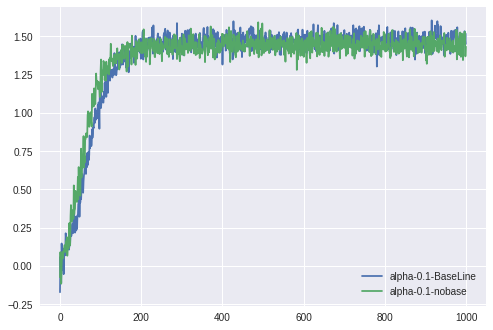

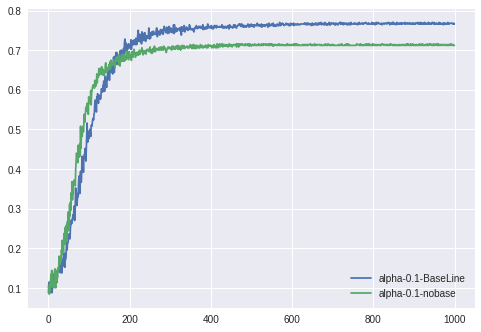

In [7]:
reward4, percOptAction4 = kArmedBandits(epsilon = 0.0, typeOfUpdate = 'Gradient', noOfRuns = 500)
reward5, percOptAction5 = kArmedBandits(epsilon = 0.0, typeOfUpdate = 'Gradient', noOfRuns = 500, includeGradientBaseLine = True)

rewardDf = pd.DataFrame({'alpha-0.1-nobase' : reward4,'alpha-0.1-BaseLine' : reward5})
percOptActionDf = pd.DataFrame({'alpha-0.1-nobase' : percOptAction4, 'alpha-0.1-BaseLine' : percOptAction5})

rewardDf.plot()
plt.show()

percOptActionDf.plot()
plt.show()